In [2]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
import librosa.display
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import scipy.stats as stats
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
from sklearn import tree
import pandas as pd
import IPython.display as ipd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Pre-Processing

In [3]:
data_dir = "../data/cry"

file_paths = []
genders = []
ages = []
reasons = []

gender_mapping = {'m': 'male', 'f': 'female'}
age_mapping = {'04': '0 to 4 weeks old', '48': '4 to 8 weeks old', '26': '2 to 6 months old', '72': '7 month to 2 years old', '22': 'more than 2 years old'}
reason_mapping = {'hu': 'Hungry', 'bu': 'NeedsBurping', 'bp': 'BellyPain', 'dc': 'Discomfort', 'ti': 'Tired', 'lo': 'Lonely', 'ch': 'Cold/Hot', 'sc': 'Scared', 'dk': "Don'tKnow"}

In [4]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav") or file.endswith(".3gp") or file.endswith(".caf"):
            file_path = os.path.join(root, file)  # Get full file path
            file_paths.append(file_path)
            file_name = os.path.splitext(file)[0]  # Remove file extension
            parts = file_name.split("-")  # Split filename by '-'
            gender = gender_mapping.get(parts[-3][0])  # Extract gender
            age = age_mapping.get(parts[-2])  # Extract age
            reason = reason_mapping.get(parts[-1])  # Extract reason
            genders.append(gender)
            ages.append(age)
            reasons.append(reason)

df = pd.DataFrame({'File_Path': file_paths, 'Gender': genders, 'Age': ages, 'Reason': reasons})

In [5]:
df

,File_Path,Gender,Age,Reason
0,../data/cry\006dbee7-715a-46ee-b592-1c4e7affb7...,female,2 to 6 months old,Hungry
1,../data/cry\01a592eb-513d-4431-b7ba-b0fba5a009...,male,0 to 4 weeks old,Hungry
2,../data/cry\021DCB9F-2FC6-4247-859F-E58EDB682B...,female,2 to 6 months old,Don'tKnow
3,../data/cry\021DCB9F-2FC6-4247-859F-E58EDB682B...,female,2 to 6 months old,Don'tKnow
4,../data/cry\026895D0-6B93-4D1F-846F-AA279AD339...,male,0 to 4 weeks old,Hungry
...,...,...,...,...
1580,../data/cry\FF482278-24C9-4FB0-A7BE-FD92D1FE17...,male,2 to 6 months old,Hungry
1581,../data/cry\FF482278-24C9-4FB0-A7BE-FD92D1FE17...,male,2 to 6 months old,Hungry
1582,../data/cry\FF482278-24C9-4FB0-A7BE-FD92D1FE17...,male,2 to 6 months old,Lonely
1583,../data/cry\FF9924CF-5854-4B70-AD06-5BC3ED0753...,female,0 to 4 weeks old,Hungry


In [6]:
df.isnull().sum()

File_Path    0
Gender       0
Age          0
Reason       2
dtype: int64

In [7]:
df = df.dropna()
df

,File_Path,Gender,Age,Reason
0,../data/cry\006dbee7-715a-46ee-b592-1c4e7affb7...,female,2 to 6 months old,Hungry
1,../data/cry\01a592eb-513d-4431-b7ba-b0fba5a009...,male,0 to 4 weeks old,Hungry
2,../data/cry\021DCB9F-2FC6-4247-859F-E58EDB682B...,female,2 to 6 months old,Don'tKnow
3,../data/cry\021DCB9F-2FC6-4247-859F-E58EDB682B...,female,2 to 6 months old,Don'tKnow
4,../data/cry\026895D0-6B93-4D1F-846F-AA279AD339...,male,0 to 4 weeks old,Hungry
...,...,...,...,...
1580,../data/cry\FF482278-24C9-4FB0-A7BE-FD92D1FE17...,male,2 to 6 months old,Hungry
1581,../data/cry\FF482278-24C9-4FB0-A7BE-FD92D1FE17...,male,2 to 6 months old,Hungry
1582,../data/cry\FF482278-24C9-4FB0-A7BE-FD92D1FE17...,male,2 to 6 months old,Lonely
1583,../data/cry\FF9924CF-5854-4B70-AD06-5BC3ED0753...,female,0 to 4 weeks old,Hungry


In [8]:
df.isnull().sum()

File_Path    0
Gender       0
Age          0
Reason       0
dtype: int64

# EDA

In [9]:
len(df)

1583

In [10]:
df.nunique()

File_Path    1583
Gender          2
Age             5
Reason          9
dtype: int64

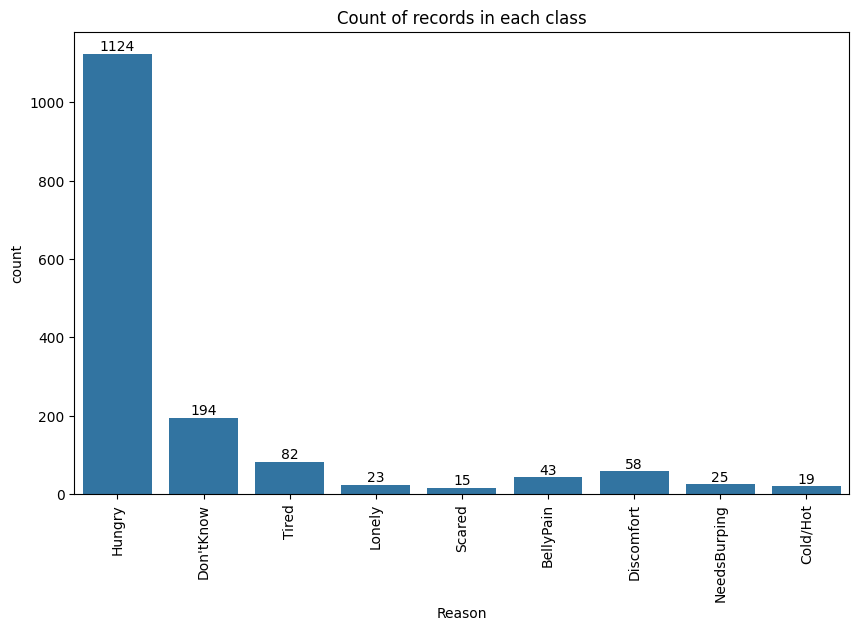

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Reason', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [13]:
file_path= '../data/cry/fa8620d3-e7db-4101-aff0-28dbf0d96a5f-1434296505682-1.7-f-04-hu.wav'
audio, sample_rate = librosa.load(file_path)
audio

array([ 1.1961962e-06,  1.5121072e-06,  2.1514893e-07, ...,
       -5.6074567e-02, -3.4601580e-02, -1.3738567e-02], dtype=float32)

In [14]:
sample_rate

22050

In [ ]:
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

# Feature Engineering

In [19]:
file_path = '../data/cry/crydetection/donateacry-corpus-master/donateacry-ios-upload-bucket/021DCB9F-2FC6-4247-859F-E58EDB682B79-1429977251-1.0-f-26-dk.caf'
y, sr = librosa.load(file_path)

In [20]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    # Additional features
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Aggregate statistics for each feature
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_rolloff_mean = np.mean(spectral_rolloff)

    # Concatenate selected features
    features = np.concatenate([
        [zero_crossing_rate_mean,
         spectral_centroid_mean,
         spectral_rolloff_mean],
        mfccs_mean, mfccs_std
    ])

    return features


In [21]:
# Preprocess data
X = []
y_gender = []
y_age = []
y_reason = []

for _, row in df.iterrows():
    file_path = row['File_Path']
    gender = row['Gender']
    age = row['Age']
    reason = row['Reason']

    features = extract_features(file_path)
    X.append(features)
    y_gender.append(gender)
    y_age.append(age)
    y_reason.append(reason)

In [22]:
X = np.array(X)
y_gender = np.array(y_gender)
y_age = np.array(y_age)
y_reason = np.array(y_reason)
X

array([[2.91108842e-01, 1.55684422e+03, 2.77684659e+03, ...,
        1.06556902e+01, 1.30664778e+01, 1.50261459e+01],
       [1.55485930e-01, 1.01854835e+03, 1.82548466e+03, ...,
        1.25520668e+01, 1.29731588e+01, 1.24091349e+01],
       [2.29100641e-01, 1.31717340e+03, 2.34702978e+03, ...,
        1.38174114e+01, 1.72572784e+01, 1.48377037e+01],
       ...,
       [1.55170876e-01, 1.71565216e+03, 3.39401398e+03, ...,
        7.84820986e+00, 7.31066465e+00, 6.24977303e+00],
       [1.24870684e-01, 1.61577485e+03, 2.96989155e+03, ...,
        4.55916548e+00, 5.07666731e+00, 5.09813595e+00],
       [9.20867223e-02, 1.46961801e+03, 3.12746147e+03, ...,
        6.95736122e+00, 7.92383051e+00, 6.39507246e+00]])

In [23]:
X.shape

(1583, 29)

In [24]:
columns = ['ZCR_mean', 'Spectral_Centroid_mean', 'Spectral_Rolloff_mean'] + \
          [f'MFCC_mean_{i}' for i in range(13)] + \
          [f'MFCC_std_{i}' for i in range(13)]

df_features = pd.DataFrame(X, columns=columns)
df_features['Gender'] = y_gender
df_features['Age'] = y_age
df_features['Reason'] = y_reason
df_features


,ZCR_mean,Spectral_Centroid_mean,Spectral_Rolloff_mean,MFCC_mean_0,MFCC_mean_1,MFCC_mean_2,MFCC_mean_3,MFCC_mean_4,MFCC_mean_5,MFCC_mean_6,...,MFCC_std_6,MFCC_std_7,MFCC_std_8,MFCC_std_9,MFCC_std_10,MFCC_std_11,MFCC_std_12,Gender,Age,Reason
0,0.291109,1556.844219,2776.846591,-253.012802,12.286332,-23.774857,-21.095436,-25.712902,-8.218641,-15.896547,...,8.288568,14.561830,12.140896,11.156270,10.655690,13.066478,15.026146,male,7 month to 2 years old,BellyPain
1,0.155486,1018.548349,1825.484664,-328.204163,68.088463,-18.731401,-17.814291,-37.094059,-3.852316,-29.929068,...,15.331856,8.841002,13.802447,17.522606,12.552067,12.973159,12.409135,male,0 to 4 weeks old,Hungry
2,0.229101,1317.173405,2347.029776,-219.715988,27.020721,-22.638140,-4.450904,-26.923203,-10.361595,-2.553144,...,13.790147,10.636914,9.150768,8.403526,13.817411,17.257278,14.837704,male,0 to 4 weeks old,Hungry
3,0.243079,1284.774045,2146.645642,-291.911987,30.285198,-53.864986,-28.826775,-20.478598,-5.335493,-1.880591,...,11.009271,8.666835,9.272052,8.779317,11.308162,11.237359,16.685503,male,2 to 6 months old,Hungry
4,0.369789,1693.279746,2736.065204,-287.072601,-2.847640,-40.569485,-11.788751,-23.237793,8.991431,-20.377277,...,13.226751,13.426940,12.716999,9.286706,12.783626,15.736829,12.761366,male,0 to 4 weeks old,Hungry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,0.161822,2042.905391,4016.588185,-413.979309,73.503540,-7.868363,0.005774,-13.673873,-7.210049,-22.268248,...,12.810217,10.605865,7.417462,7.921422,7.456110,6.501521,7.741342,male,7 month to 2 years old,Hungry
1579,0.208327,2257.782794,3858.946918,-349.678070,49.796833,-51.711590,8.374624,-0.085737,-9.034664,-8.878587,...,11.617879,9.915391,8.877791,8.813204,7.796788,8.576131,7.655536,female,2 to 6 months old,Tired
1580,0.155171,1715.652156,3394.013984,-402.654114,84.188751,11.786093,20.633133,-23.564754,-18.711594,-30.921072,...,11.134249,10.231603,7.162761,9.736085,7.848210,7.310665,6.249773,male,2 to 6 months old,Tired
1581,0.124871,1615.774854,2969.891553,-588.024414,105.901573,-31.502300,-12.928548,-1.283731,16.460489,1.864500,...,5.425902,6.258644,5.330156,5.372594,4.559165,5.076667,5.098136,male,2 to 6 months old,BellyPain


In [25]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZCR_mean                1583 non-null   float64
 1   Spectral_Centroid_mean  1583 non-null   float64
 2   Spectral_Rolloff_mean   1583 non-null   float64
 3   MFCC_mean_0             1583 non-null   float64
 4   MFCC_mean_1             1583 non-null   float64
 5   MFCC_mean_2             1583 non-null   float64
 6   MFCC_mean_3             1583 non-null   float64
 7   MFCC_mean_4             1583 non-null   float64
 8   MFCC_mean_5             1583 non-null   float64
 9   MFCC_mean_6             1583 non-null   float64
 10  MFCC_mean_7             1583 non-null   float64
 11  MFCC_mean_8             1583 non-null   float64
 12  MFCC_mean_9             1583 non-null   float64
 13  MFCC_mean_10            1583 non-null   float64
 14  MFCC_mean_11            1583 non-null   

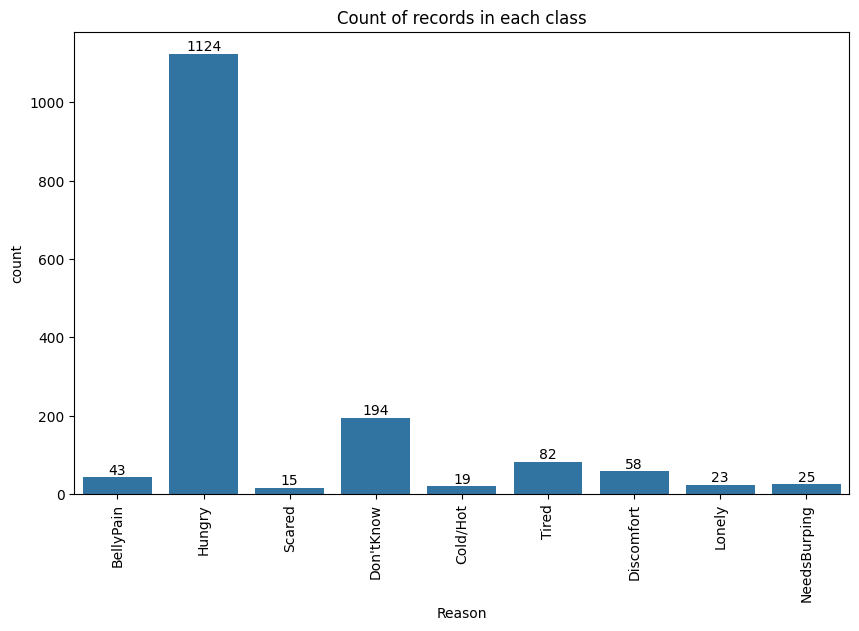

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Reason', data=df_features)
ax.bar_label(ax.containers[0])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [27]:
df['Reason'].unique()

array(['BellyPain', 'Hungry', 'Scared', "Don'tKnow", 'Cold/Hot', 'Tired',
       'Discomfort', 'Lonely', 'NeedsBurping'], dtype=object)

In [28]:
# Drop rows where 'Reason' column contains the value "Don'tKnow"
df = df[df['Reason'] != "Don'tKnow"]

In [29]:
def undersampling(df, n):
    label_0_data =  df[df['Reason'] == 'Hungry']
    label_1_data = df[df['Reason'] == 'BellyPain']
    label_2_data = df[df['Reason'] == 'Scared']
    label_3_data = df[df['Reason'] == 'Cold/Hot']
    label_4_data = df[df['Reason'] == 'Tired']
    label_5_data = df[df['Reason'] == 'Discomfort']
    label_6_data = df[df['Reason'] == 'Lonely']
    label_7_data = df[df['Reason'] == 'NeedsBurping']

    # Undersample label 0 data
    undersampled_label_0_data = label_0_data.sample(n=n, random_state= 42)

    # Concatenate the undersampled label 0 data with label 1 and label 2 data
    undersampled_data = pd.concat([undersampled_label_0_data, label_1_data, label_2_data, label_3_data,label_4_data, label_5_data, label_6_data,label_7_data])

    return undersampled_data

In [30]:
df_features = undersampling(df_features, 400)

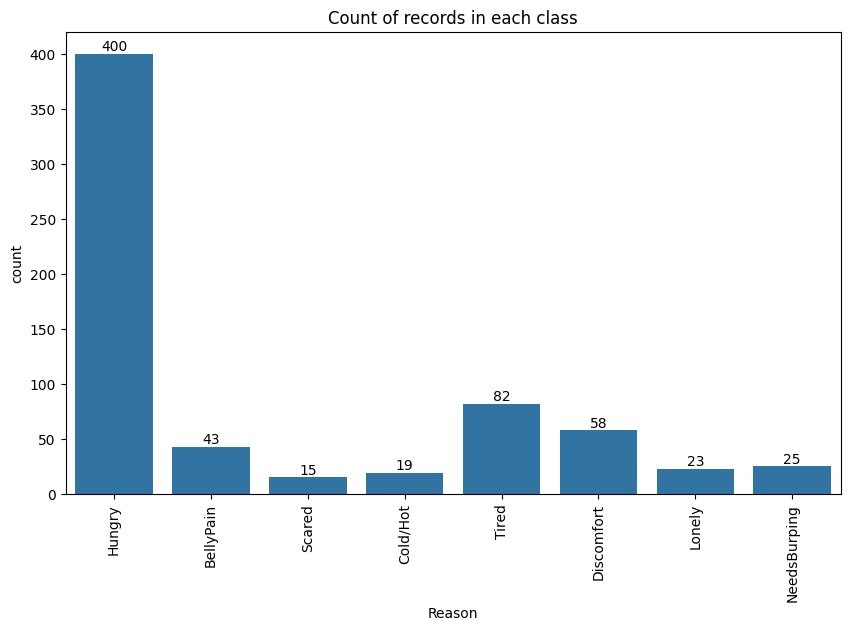

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Reason', data=df_features)
ax.bar_label(ax.containers[0])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [32]:
gender_mapping = {'male': 0, 'female': 1}
df_features['Gender'] = df_features['Gender'].map(gender_mapping)

age_mapping = {
    '0 to 4 weeks old': 0,
    '4 to 8 weeks old': 1,
    '2 to 6 months old': 2,
    '7 month to 2 years old': 3,
    'more than 2 years old': 4
}
df_features['Age'] = df_features['Age'].map(age_mapping)

reason_mapping = {
    'BellyPain': 0,
    'Hungry': 1,
    'Scared': 2,
    'Cold/Hot': 3,
    'Tired': 4,
    'Discomfort': 5,
    'Lonely': 6,
    'NeedsBurping': 7
}
df_features['Reason'] = df_features['Reason'].map(reason_mapping)

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(df_features.drop('Reason', axis =1), df_features['Reason'])

df_smote = pd.concat([X_smote, y_smote], axis =1)
df_smote

,ZCR_mean,Spectral_Centroid_mean,Spectral_Rolloff_mean,MFCC_mean_0,MFCC_mean_1,MFCC_mean_2,MFCC_mean_3,MFCC_mean_4,MFCC_mean_5,MFCC_mean_6,...,MFCC_std_6,MFCC_std_7,MFCC_std_8,MFCC_std_9,MFCC_std_10,MFCC_std_11,MFCC_std_12,Gender,Age,Reason
0,0.144915,1873.037896,3774.650400,-246.580154,76.775215,-22.961876,-3.479047,-11.076176,-7.957390,-18.882435,...,8.910933,7.323301,11.989147,7.313344,6.238092,6.444105,8.194695,0,3,1
1,0.110849,1779.159972,3679.259418,-248.550781,81.872200,-21.356106,4.760784,-5.211967,5.136689,-13.756485,...,10.187086,7.064811,6.285809,6.819597,5.635621,5.382377,5.601028,0,3,1
2,0.178308,1303.934069,2731.257167,-647.564392,47.106949,18.551620,11.280884,2.849185,2.903591,-2.763392,...,4.682889,4.035648,3.561264,3.977277,5.114929,4.442084,3.956990,1,3,1
3,0.255855,1441.094938,2708.894782,-360.916718,32.777321,-3.979437,-10.333799,-27.912251,-5.026433,-3.066946,...,8.814418,8.330377,8.961823,11.097195,7.030801,12.129759,8.111450,1,3,1
4,0.052598,935.575512,1690.532249,-224.617966,146.249725,-3.384800,9.245109,-1.370500,6.633325,-7.232229,...,5.987889,7.408970,4.782852,5.177367,5.300653,4.855257,4.974745,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.358098,1777.205732,2737.388882,-69.008101,-27.422916,-30.767318,7.002488,-41.079300,-2.913523,-18.863216,...,14.342036,11.778630,13.123964,13.198211,11.928709,17.102217,17.705539,0,2,7
3196,0.140376,2076.179396,4437.065894,-432.406144,62.812999,-2.955667,5.783744,-5.167253,4.729572,-14.519375,...,7.652417,5.689994,7.128276,5.785025,6.336347,5.432778,7.509996,0,1,7
3197,0.393736,2072.836953,3228.454519,-123.787151,-23.607211,-23.476534,-2.549140,-4.074947,7.992887,-23.433655,...,11.518078,11.893085,8.271991,10.036341,10.653931,8.149802,8.830014,0,1,7
3198,0.221287,1787.645554,3341.210979,-223.856608,45.933197,-0.281718,16.640480,-7.005643,-0.415014,-12.758940,...,10.312768,11.789016,8.561813,9.521237,7.044433,6.923500,5.777699,0,2,7


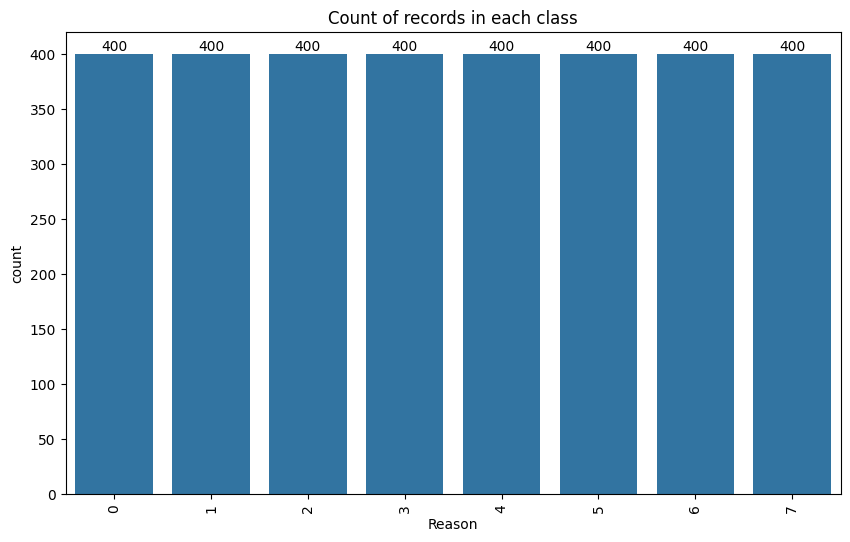

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Reason', data=df_smote)
ax.bar_label(ax.containers[0])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [35]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings("ignore")

In [37]:
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
lgm = LGBMClassifier()
cat = CatBoostClassifier()
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')
svm_sigmoid = SVC(kernel='sigmoid')
lda = LinearDiscriminantAnalysis()
nb_gaussian = GaussianNB()
nb_multinomial = MultinomialNB()
nb_bernoulli = BernoulliNB()
knn = knn = KNeighborsClassifier()

clfs = {
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'LightGBM': lgm,
    'CatBoost': cat,
    'xgb': xgb,
    'KNN': knn,
    #'SVM_Linear': svm_linear,
    #'SVM_Poly': svm_poly,
    #'SVM_RBF': svm_rbf,
    #'SVM_Sigmoid': svm_sigmoid,
    'LDA': lda,
    'NB_Gaussian': nb_gaussian,
    #'NB_Multinomial': nb_multinomial,
    'NB_Bernoulli': nb_bernoulli
}

In [38]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    return accuracy, precision

In [39]:
X = df_smote.drop('Reason', axis =1)
y = df_smote['Reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [40]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  DT
Accuracy -  0.784375
Precision -  0.7831574580371434
For  LR
Accuracy -  0.396875
Precision -  0.37328485799406935
For  RF
Accuracy -  0.9385416666666667
Precision -  0.9370410228770456
For  AdaBoost
Accuracy -  0.3458333333333333
Precision -  0.33892150307312624
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7402
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 31
[LightGBM] [Info] Start training from score -1.990646
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.047804
[LightGBM] [Info] Start training from score -2.108429
[LightGBM] [Info] Start training from score -2.115809
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.104759
[LightGBM] [Info] Start training from score -2.115809
[LightGB

In [41]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,CatBoost,0.947917,0.946921
4,LightGBM,0.938542,0.937544
2,RF,0.938542,0.937041
6,xgb,0.929167,0.928040
0,DT,0.784375,0.783157
7,KNN,0.741667,0.738366
8,LDA,0.595833,0.597415
9,NB_Gaussian,0.493750,0.489036
1,LR,0.396875,0.373285
3,AdaBoost,0.345833,0.338922


In [42]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,CatBoost,Accuracy,0.947917
1,LightGBM,Accuracy,0.938542
2,RF,Accuracy,0.938542
3,xgb,Accuracy,0.929167
4,DT,Accuracy,0.784375
5,KNN,Accuracy,0.741667
6,LDA,Accuracy,0.595833
7,NB_Gaussian,Accuracy,0.493750
8,LR,Accuracy,0.396875
9,AdaBoost,Accuracy,0.345833


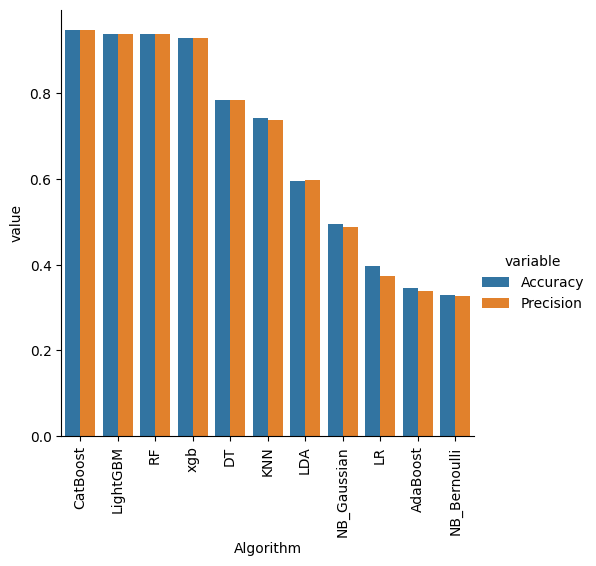

In [43]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [44]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [46]:
# rfc = RandomForestClassifier(random_state=42)
# model = GridSearchCV(rfc, param_grid,  cv = 2, verbose=True, n_jobs = -1)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [47]:
# print('accuracy: ', accuracy_score(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred, average = 'weighted'))
# print('F1 Score: ', f1_score(y_test, y_pred, average = 'weighted'))

In [48]:
# print('Best Parameters: ', model.best_params_)

In [49]:
df_smote.to_csv('../data/cry.csv.', index = False)